# Módulo 5 - Aprendizado não-supervisionado e por reforço

Neste notebook, implementaremos algoritmos de aprendizado não-supervisionado e por reforço. Na primeira parte, veremos a implementação do algoritmo k-means. Na segunda parte, veremos o algoritmo Q-learning. Em ambos os casos, o objetivo é entender como estes algoritmos funcionam. Ao final, você deverá realizar os exercícios propostos.

## Parte 1 - Aprendizado não-supervisionado

Vamos começar utilizando o algoritmo k-means para agrupar as amostras de plantas iris em três clusters sem utilizar os rótulos destas amostras. Utilizaremos a implementação do k-means disponível na biblioteca [scikit-learn](https://scikit-learn.org/stable/).

Primeiramente, precisamos importar algumas bibliotecas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import confusion_matrix

np.random.seed(98237)

Em seguida, podemos importar o dataset e fazer alguns pré-processamentos básicos.

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

Nosso próximo passo é executar o algoritmo k-means. Para isso, podemos criar uma instância do algoritmo especificando o número de clusters desejados. Em seguida, basta chamar o método `fit`, que recebe os dados (`X`) e executa o algoritmo.

In [3]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

KMeans(n_clusters=3)

Como a tarefa é simples, a execução é rápida.

Agora podemos criar um gráfico para permitir a visualização dos clusters resultantes. Note que este dataset possui quatro features. Considerando que podemos criar gráficos de no máximo três dimensões, precisamos selecionar quais features serão plotadas. No nosso caso, vamos ignorar o comprimento da sépala e utilizar as demais features.

In [4]:
print('Available features:', iris.feature_names)

# for plotting, select only three features (as we can only plot three dimensions)
features_to_plot = [3,0,2]
feature_names = np.choose(features_to_plot, iris.feature_names)

print('Features selected for plotting:',feature_names)

assert len(features_to_plot) == 3

Available features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Features selected for plotting: ['petal width (cm)' 'sepal length (cm)' 'petal length (cm)']


Antes de criar o gráfico, vamos definir as cores que utilizaremos para os clusters. Basta criar a lista abaixo com as cores (cuidando para que especificar uma cor para cada cluster).

In [5]:
colours = ['r', 'g', 'b']

assert len(colours) == k

Agora sim podemos criar o gráfico utilizando os dados (`X`), os clusters encontrados (`kmeans.labels_`), e as cores definidas (`colours`).
Note que, além de plotar os dados, estamos plotando também os centróides dos clusters (`kmeans.cluster_centers_`).

In [6]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

y_colours = np.choose(kmeans.labels_, colours) # colour of the data points

ax.scatter(X[:, features_to_plot[0]], X[:, features_to_plot[1]], X[:, features_to_plot[2]], c=y_colours, edgecolor='k', s=50)
ax.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], edgecolor='k', s=500, marker=(5,1), c=colours, depthshade=False)

ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.set_zlabel(feature_names[2])

fig.show()

<Figure size 800x600 with 0 Axes>

Finalmente, para poder verificar o quão bom foi nosso algoritmo, podemos plotar também as classes reais de cada amostra. O processo aqui é parecido com o gráfico anterior. A diferença é que vamos definir a cor de cada amostra com base nas classes reais (`y`) ao invés das encontradas pelo algoritmo (`kmeans.labels_`).

In [7]:
# Plot the ground truth
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

y_colours = np.choose(y, colours) # colour of the data points

ax.scatter(X[:, features_to_plot[0]], X[:, features_to_plot[1]], X[:, features_to_plot[2]], c=y_colours, edgecolor='k', s=50)

ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.set_zlabel(feature_names[2])

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean()-0.3, X[y == label, 0].mean()+1.3, X[y == label, 2].mean(), name, horizontalalignment='center', bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

fig.show()

<Figure size 800x600 with 0 Axes>

Como pode ser observado, os resultados obtidos são muito próximos dos rótulos reais. De fato, conforme visto abaixo, apenas 10.67% das amostras foram agrupadas de forma incorreta.

In [8]:
y_out = kmeans.labels_ # predicted labels
#y_adj = np.choose(y_out, [0,1,2]) # uncomment if you need to align predicted and true label numbers
wrong = sum([ int(y[i] != y_out[i]) for i in range(len(y))]) # count mismatches

print('True labels: %s' % y)
print('k-means labels: %s' % y_out)
print('Wrong classifications: %d (%.2f%%)' % (wrong, wrong/1.5))

True labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
k-means labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
Wrong classifications: 83 (55.33%)


Finalmente, de modo a entender onde o algoritmo errou, podemos analisar a matriz de confusão gerada. O código abaixo faz precisamente isto.

In [9]:
confusion_matrix(y, y_out)

array([[50,  0,  0],
       [ 0,  3, 47],
       [ 0, 36, 14]])

### Exercício 1

Utilize o algoritmo k-means visto na parte 1 para agrupar os dígitos do dataset MNIST (use o método [load_digit](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)) em 10 clusters. Ao final, mostre algumas imagens de cada cluster para permitir uma melhor análise dos resultados.

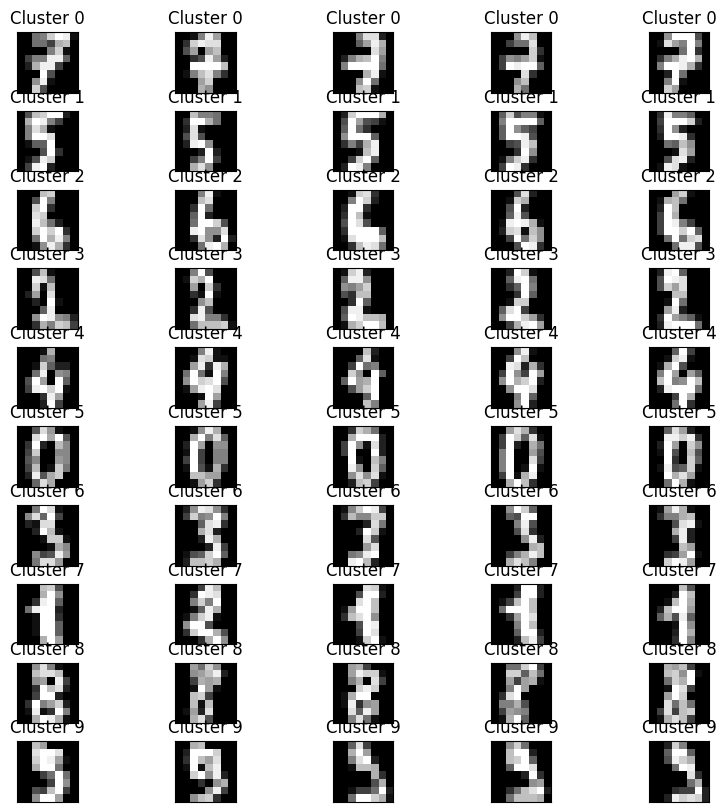

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

digits = datasets.load_digits()

X = digits.data
y = digits.target

k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

labels = kmeans.labels_

def plot_digits_clusters(kmeans, X, y, labels, n_images_per_cluster=5):
    fig, axes = plt.subplots(k, n_images_per_cluster, figsize=(10, 10),
                             subplot_kw={'xticks': [], 'yticks': []},
                             gridspec_kw=dict(hspace=0.3, wspace=0.1))

    for cluster in range(k):
        cluster_images = X[labels == cluster]
        for i in range(n_images_per_cluster):
            if i < len(cluster_images):
                ax = axes[cluster, i]
                ax.imshow(cluster_images[i].reshape(8, 8), cmap='gray')
                ax.set_title(f'Cluster {cluster}')

plot_digits_clusters(kmeans, X, y, labels)
plt.show()

## Parte 2 - Aprendizado por reforço

Na segunda parte deste notebook, implementaremos o algoritmo de aprendizado por reforço chamado Q-learning para resolver problemas fornecidos pelo [Open AI Gym](http://gym.openai.com/envs/).

Primeiramente, precisamos importar algumas bibliotecas.

In [11]:
import gym
import numpy as np
import matplotlib.pyplot as plt
!pip install pygame
import pygame
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

Em nosso exemplo, tentaremos resolver o problema chamado Cliff Walking, apresentado na figura abaixo. Neste problema, o agente parte de S e deve chegar em G de uma forma eficiente, mas evitando o penhasco. Para cada passo, o agente recebe uma recompensa de -1. Caso o agente caia no penhasco, a recompensa é -100. O episódio termina quando o agente chega em G ou cai no penhasco. Naturalmente, o objetivo é chegar em G o mais rapidamente possível para maximizar sua recompensa.

![alt text](https://i.imgur.com/2IobMYw.png)

Para utilizar este ambiente com o Gym, basta executar o comando abaixo.

In [12]:
cliff_env = gym.make('CliffWalking-v0')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


O ambiente pode ser reiniciado com a função `reset`. Podemos imprimir o estado atual do ambiente com a função `render`.

In [13]:
cliff_env.reset()
cliff_env.render()

/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


O código abaixo implementa o algoritmo Q-learning. O pseudocódigo do Q-learning é apresentado abaixo.

![alt text](https://i.imgur.com/9yydGca.png)

Em nossa implementação, o algoritmo recebe um ambiente, uma quantidade de episódios, além dos parâmetros usuais $\alpha$ (taxa de aprendizado), $\gamma$ (taxa de desconto) e $\epsilon$ (taxa de exploração).

In [29]:
def Qlearning(environment, num_episodes=100, alpha=0.3, gamma=0.9, epsilon=1.0, decay_epsilon=0.1, max_epsilon=1.0, min_epsilon=0.01):

  # initializing the Q-table
  Q = np.zeros((environment.observation_space.n, environment.action_space.n))

  # additional lists to keep track of reward and epsilon values
  rewards = []
  epsilons = []

  # episodes
  for episode in range(num_episodes):

      # reset the environment to start a new episode
      state = environment.reset()

      # reward accumulated along episode
      accumulated_reward = 0

      # steps within current episode
      for step in range(100):

          # epsilon-greedy action selection
          # exploit with probability 1-epsilon
          if np.random.uniform(0, 1) > epsilon:
              action = np.argmax(Q[state,:])

          # explore with probability epsilon
          else:
              action = environment.action_space.sample()

          # perform the action and observe the new state and corresponding reward
          new_state, reward, done, info = environment.step(action)


          # update the Q-table
          Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action])

          # update the accumulated reward
          accumulated_reward += reward

          # update the current state
          state = new_state

          # end the episode when it is done
          if done == True:
              break

      # decay exploration rate to ensure that the agent exploits more as it becomes experienced
      epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_epsilon*episode)

      # update the lists of rewards and epsilons
      rewards.append(accumulated_reward)
      epsilons.append(epsilon)

  # render the environment
  environment.render()

  # return the list of accumulated reward along episodes
  return rewards

Para utilizar o Q-learning, basta chamá-lo como segue. No exemplo abaixo, vamos executar o algoritmo por 100 episódios. Ao final, calculamos a recompensa média total (ao longo de todos episódios) e a final (ao longo dos últimos 10 episódios).

In [25]:
num_episodes=100
alpha=0.3
gamma=0.9
epsilon=1.0
decay_epsilon=0.1

# run Q-learning
rewards = Qlearning(cliff_env, num_episodes, alpha, gamma, epsilon, decay_epsilon)

# print results
print ("Average reward (all episodes): " + str(sum(rewards)/num_episodes))
print ("Average reward (last 10 episodes): " + str(sum(rewards[-10:])/10))

Average reward (all episodes): -128.48
Average reward (last 10 episodes): -19.8


Para avaliar o desempenho do algoritmo, podemos criar um gráfico da recompensa total por episódio.

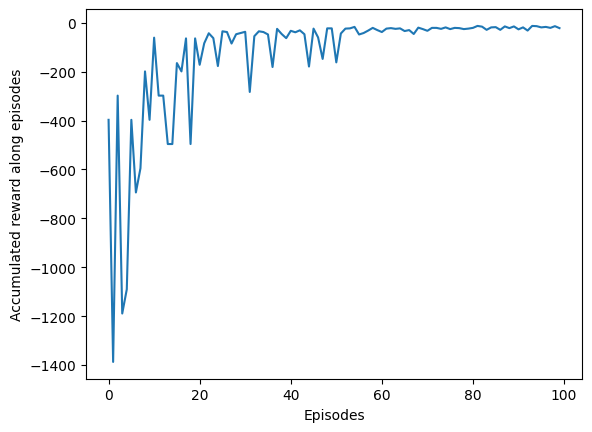

In [26]:
plt.plot(range(num_episodes), rewards)
plt.xlabel('Episodes')
plt.ylabel('Accumulated reward along episodes')
plt.show()

Com base no gráfico acima, podemos observar que o algoritmo converge para uma recompensa próxima de zero. Considerando que a recompensa máxima neste ambiente é -13, podemos dizer que o algoritmo convergiu para uma política próxima da ótima.

### Exercício 2

Ajuste os parâmetros do algoritmo Q-learning para obter melhores resultados. Em seguida, rode o algoritmo com a melhor política aprendida, ou seja, escolhendo as ações de forma gulosa.

Episódio 1 | Recompensa acumulada: -13 | Passos: 13
Episódio 2 | Recompensa acumulada: -13 | Passos: 13
Episódio 3 | Recompensa acumulada: -13 | Passos: 13
Episódio 4 | Recompensa acumulada: -13 | Passos: 13
Episódio 5 | Recompensa acumulada: -13 | Passos: 13
Episódio 6 | Recompensa acumulada: -13 | Passos: 13
Episódio 7 | Recompensa acumulada: -13 | Passos: 13
Episódio 8 | Recompensa acumulada: -13 | Passos: 13
Episódio 9 | Recompensa acumulada: -13 | Passos: 13
Episódio 10 | Recompensa acumulada: -13 | Passos: 13
Recompensa média (todos os episódios): -287.832
Recompensa média (últimos 10 episódios): -24.4


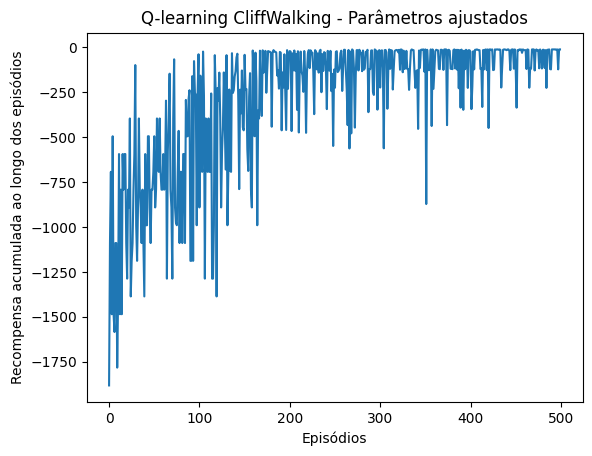

In [30]:
num_episodes = 500  # Aumentando o número de episódios para dar mais tempo para aprender
alpha = 0.1  # Taxa de aprendizado menor para uma convergência mais estável
gamma = 0.99  # Valorizando mais as recompensas futuras
epsilon = 1.0  # Iniciando com alta exploração
decay_epsilon = 0.005  # Reduzindo a exploração mais devagar
min_epsilon = 0.01  # Mantendo alguma exploração ao longo do tempo

rewards = Qlearning(cliff_env, num_episodes, alpha, gamma, epsilon, decay_epsilon)

print("Recompensa média (todos os episódios):", sum(rewards)/num_episodes)
print("Recompensa média (últimos 10 episódios):", sum(rewards[-10:])/10)

plt.plot(range(num_episodes), rewards)
plt.xlabel('Episódios')
plt.ylabel('Recompensa acumulada ao longo dos episódios')
plt.title('Q-learning CliffWalking - Parâmetros ajustados')
plt.show()


## Referências



* https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html
* https://machinelearningmastery.com/clustering-algorithms-with-python/